#### Diabetes Progression Prediction Using Polynomial Regression

## Getting the data

In [69]:
from sklearn import datasets
datasets.load_diabetes()

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

## Frame the problem

### To draw relationship between between BMI and the progression of diabetes  in the diabetes dataset

## EDA

In [80]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [90]:
# Statistics
print(df.describe())
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
df = pd.DataFrame(diabetes_X, columns=[f'feature_{i}' for i in range(diabetes_X.shape[1])])
df['target'] = diabetes_y



          feature_0     feature_1     feature_2     feature_3     feature_4   
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  \
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

          feature_5     feature_6     feature_7     feature_8     feature_9   
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  \
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.

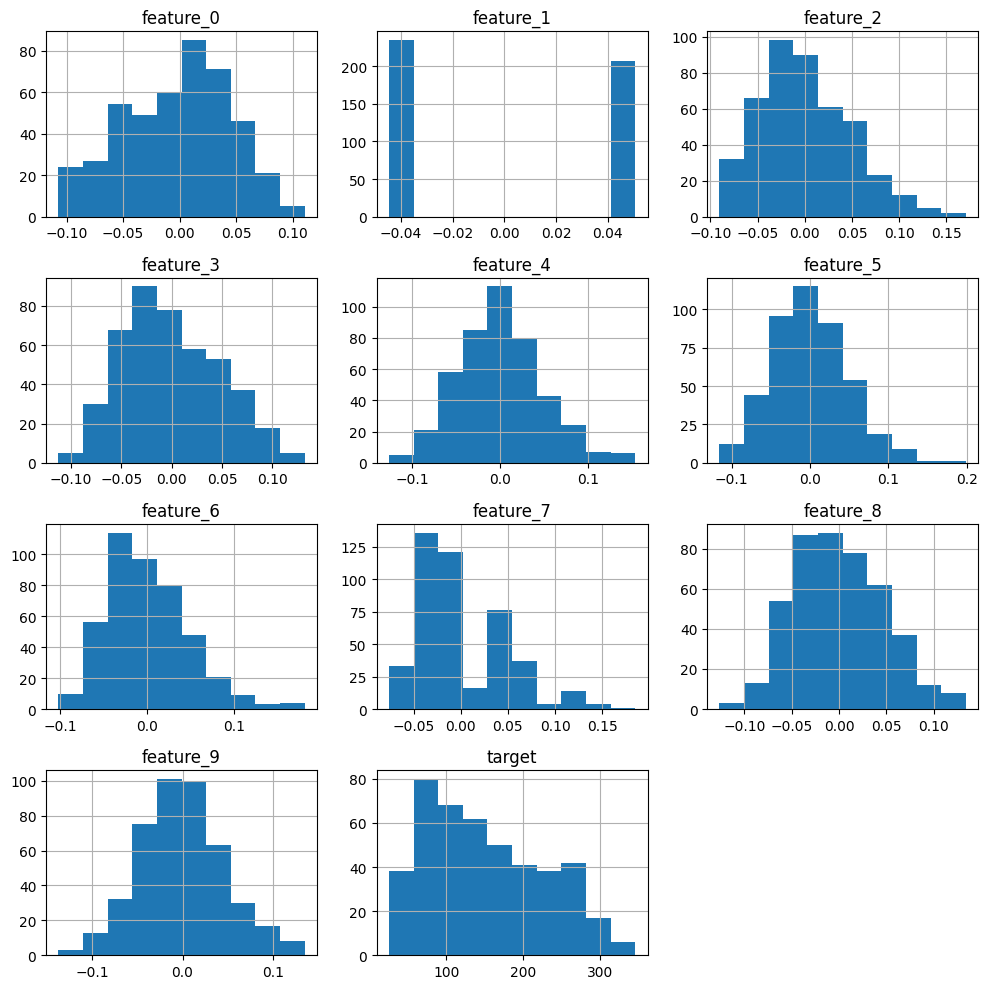

In [106]:
# Explore the data
df.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

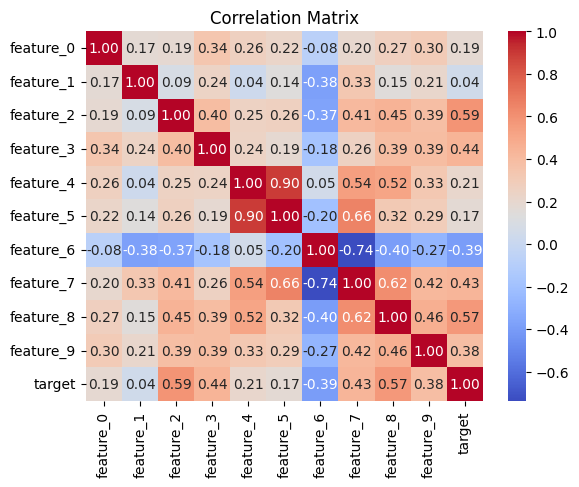

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt
# Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline  # Add this import
from sklearn.metrics import r2_score

In [94]:
# Assuming you have your data loaded into a DataFrame named 'df'
# If your DataFrame has different column names, adjust accordingly

# Extract 'bmi' and 'disease progression' as features and target variable
X = df[['feature_1']]
y = df['target']

In [95]:
# Split the data into train, validation, and test sets
train_X, temp_X, train_y, temp_y = train_test_split(X, y, test_size=0.3, random_state=42)
val_X, test_X, val_y, test_y = train_test_split(temp_X, temp_y, test_size=0.5, random_state=42)

In [96]:
# Initialize arrays to store results
train_r2_scores = []
val_r2_scores = []
test_r2_scores = []


In [97]:
# Loop through polynomial degrees
for degree in range(6):
    # Create polynomial features and fit linear regression model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(train_X, train_y)

In [99]:
train_pred = model.predict(train_X)
train_r2 = r2_score(train_y, train_pred)
train_r2_scores.append(train_r2)
# Validation set
val_pred = model.predict(val_X)
val_r2 = r2_score(val_y, val_pred)
val_r2_scores.append(val_r2)    
# Test set
test_pred = model.predict(test_X)
test_r2 = r2_score(test_y, test_pred)
test_r2_scores.append(test_r2) 

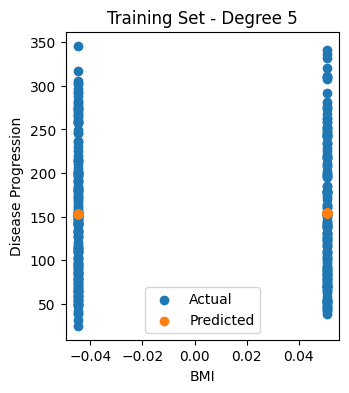

In [101]:
# Plot the results
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.scatter(train_X, train_y, label='Actual')
plt.scatter(train_X, train_pred, label='Predicted')
plt.title(f'Training Set - Degree {degree}')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.legend()


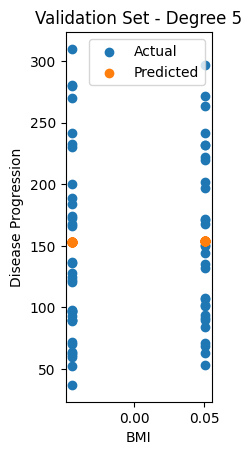

In [102]:
plt.subplot(1, 3, 2)
plt.scatter(val_X, val_y, label='Actual')
plt.scatter(val_X, val_pred, label='Predicted')
plt.title(f'Validation Set - Degree {degree}')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.legend()

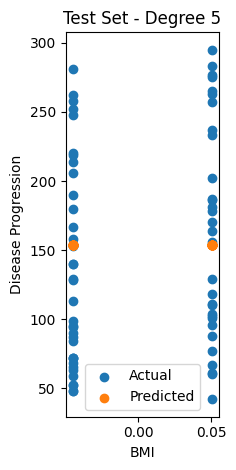

In [103]:
plt.subplot(1, 3, 3)
plt.scatter(test_X, test_y, label='Actual')
plt.scatter(test_X, test_pred, label='Predicted')
plt.title(f'Test Set - Degree {degree}')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.legend()

plt.tight_layout()
plt.show()

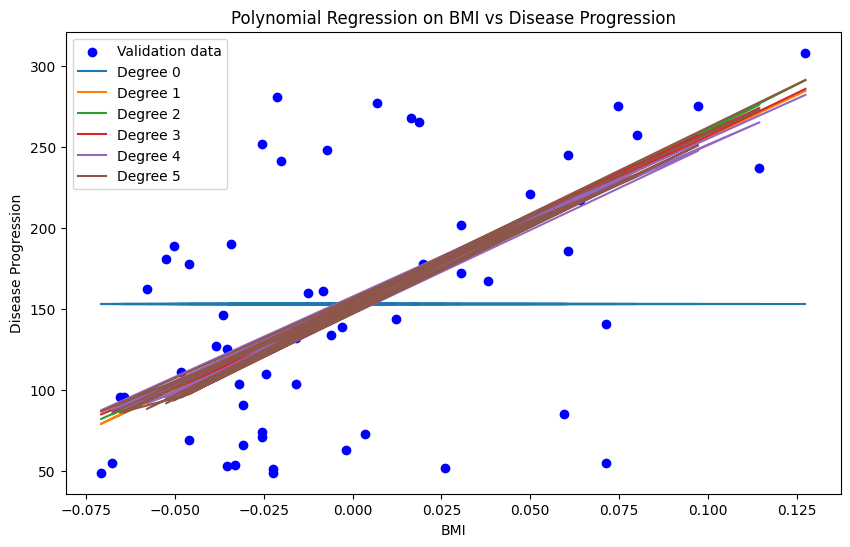

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Split the dataset into train (70%), validation (15%), and test (15%) sets
X_train_temp, X_test, y_train_temp, y_test = train_test_split(df[['feature_2']], df['target'], test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.15, random_state=42)

# Define degrees
degrees = list(range(6))

# Initialize lists to store the models and their predictions
models = []
predictions = []

# Fit polynomial regression models for each degree
for degree in degrees:
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_poly_train = poly_features.fit_transform(X_train)
    
    # Fit polynomial regression model
    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    
    # Store the model
    models.append(model)
    
    # Make predictions on validation data
    X_poly_val = poly_features.transform(X_val)
    y_pred = model.predict(X_poly_val)
    predictions.append(y_pred)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_val, y_val, color='blue', label='Validation data')
for degree, model, y_pred in zip(degrees, models, predictions):
    plt.plot(X_val, y_pred, label=f'Degree {degree}')
plt.title('Polynomial Regression on BMI vs Disease Progression')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.legend()
plt.show()

## Multiple Polynomial Models

How can we automatically define and fit multiple polynomial models at once? 
This could help us later see which one provides the best prediction.

Let's create a function to automate this process:

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

def create_polynomial_models(X: np.ndarray, y: np.ndarray, degrees: List[int]) -> dict[int, np.poly1d]:
    """
    Creates polynomial models for the given degrees and fits them to the given data.

    Args
        X: The x values of the data.
        y: The y values of the data.
        degrees: A list of polynomial degrees to try.

    Returns:
        A dictionary of polynomial models, with the polynomial degree as the key.
    """

    models = {}
    for degree in degrees:
        model = Pipeline([('polynomial', PolynomialFeatures(degree=degree)),
                          ('linear', LinearRegression())])
        model.fit(X, y)
        models[degree] = model
    return models

With the function that we've just defined, let's create 6 polynomial models, from degree 0 (constant) and up to a degree of 5: